In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder

In [32]:
df=pd.read_csv("heart_disease_data.csv")
df.drop(columns="PatientID",inplace=True)
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,Male,Asymptomatic,131,287,1,LVH,69,No,0.0,Up,1
1,57,Male,Atypical,147,156,1,ST,187,Yes,2.3,Up,1
2,43,Male,Non-anginal,101,119,1,ST,158,No,3.4,Up,1
3,71,Female,Typical,92,372,1,LVH,171,Yes,2.9,Up,1
4,36,Female,Non-anginal,107,218,0,LVH,119,No,5.2,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,58,Female,Non-anginal,110,261,1,LVH,129,Yes,3.7,Up,1
796,45,Female,Atypical,163,199,0,ST,103,Yes,1.8,Down,1
797,76,Female,Asymptomatic,127,240,0,ST,145,Yes,5.4,Up,0
798,75,Female,Atypical,135,182,1,Normal,78,Yes,3.8,Flat,1


In [33]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,67,1,0,131,287,1,0,69,0,0.0,2,1
1,57,1,1,147,156,1,2,187,1,2.3,2,1
2,43,1,2,101,119,1,2,158,0,3.4,2,1
3,71,0,3,92,372,1,0,171,1,2.9,2,1
4,36,0,2,107,218,0,0,119,0,5.2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,58,0,2,110,261,1,0,129,1,3.7,2,1
796,45,0,1,163,199,0,2,103,1,1.8,0,1
797,76,0,0,127,240,0,2,145,1,5.4,2,0
798,75,0,1,135,182,1,1,78,1,3.8,1,1


In [34]:
x=df.drop(columns="HeartDisease")
y=df["HeartDisease"]
y

0      1
1      1
2      1
3      1
4      1
      ..
795    1
796    1
797    0
798    1
799    1
Name: HeartDisease, Length: 800, dtype: int64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [36]:
model=SVC(kernel="rbf")
model.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [37]:
pre=model.predict(x_test)
pre

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1])

In [38]:
accuracy=accuracy_score(y_test,pre)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:72.50%


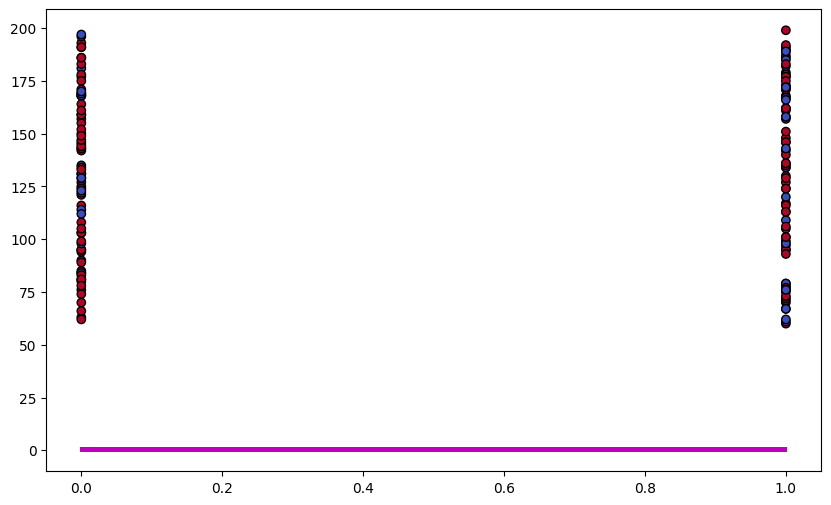

In [39]:
plt.figure(figsize=[10,6])
plt.scatter(x_test["Gender"],x_test["MaxHR"],c=pre,cmap="coolwarm",edgecolors="k")
plt.plot(x_test["Gender"],pre,color="m")
plt.show()

In [42]:
new=pd.DataFrame({
    "Age":[58],
    "Gender":label.fit_transform(["Male"]),
    "ChestPainType":label.fit_transform(["Asymptomatic"]),
    "RestingBP":[134],
    "Cholesterol":[281],
    "FastingBS":[1],
    "RestingECG":[0],
    "MaxHR":[67],
    "ExerciseAngina":[0],
    "Oldpeak":[0.0],
    "ST_Slope":[2]

})
p=model.predict(new)
p

array([1])